<a href="https://colab.research.google.com/github/kabirchhabra/Skillslash/blob/main/Heart_Failure_Predictions/Heart_Failure_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understand problem statement
Project includes:
1. Understand columns
2. Cleaning of data - missing values, human errors, etc
3. Outlier detection
4. EDA - finding relationship b/w columns
5. Converting data to a certain format
6. Model Building
7. Training and evaluation
8. Feature importance

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/kabirchhabra/Skillslash/main/Heart_Failure_Prediction/heart_failure_clinical_records_dataset.csv')
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
#For checking whether we have imbalance data or not.
data['DEATH_EVENT'].value_counts()
#We can apply smote technique to balance the data

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [6]:
import numpy as np
from collections import Counter

def find_outlier(data, features):
  #we cannot apply outliers for categorical values, it can only be applied for 
  #numerical values only
  outliers_rows = []
  for col in features:
    Q1 = np.percentile(data[col], 25)
    Q3 = np.percentile(data[col], 75)
    IQR = Q3-Q1

    outlier_row = data[(data[col] < (Q1-(1.5*IQR))) | (data[col] > (Q3+(1.5*IQR)))].index
    outliers_rows.extend(outlier_row)
  
  outliers_rows = Counter(outliers_rows)
  return list(k for k,v in outliers_rows.items() if v>1)

In [7]:
a = find_outlier(data, ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets','serum_sodium'])
a

[163, 200, 296]

In [8]:
data = data.drop(a, axis=0).reset_index(drop=True)

In [9]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
291,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
292,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
293,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
294,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
295,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


---

**Data Cleaning + EDA**

In [10]:
def clean_age(age):
  if age>=0 and age<=120:
    return age
  else:
    return np.nan

data['age'] = data['age'].apply(clean_age)

In [11]:
data['age'].isnull().sum()

0

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


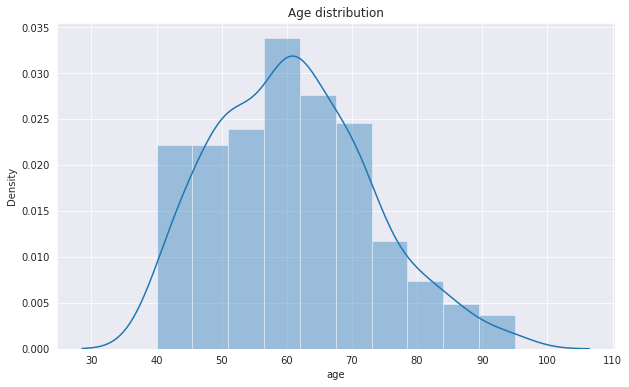

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(data['age'])
plt.title('Age distribution')
plt.show()

+ Depicts a normal distribution
+ Majorly age lies between 40 and 95

*Check Skewness*

In [14]:
data.skew(axis=0)

age                         0.416215
anaemia                     0.288147
creatinine_phosphokinase    4.613062
diabetes                    0.344512
ejection_fraction           0.563358
high_blood_pressure         0.610375
platelets                   1.322923
serum_creatinine            4.441127
serum_sodium               -1.041150
sex                        -0.641586
smoking                     0.754384
time                        0.131173
DEATH_EVENT                 0.771002
dtype: float64

+ Creatinine has highest skewness and also serum_creatinine
+ Positive skewness means data is oriented towards the left side whereas the negative skewness means data is oriented towardsw the right side.

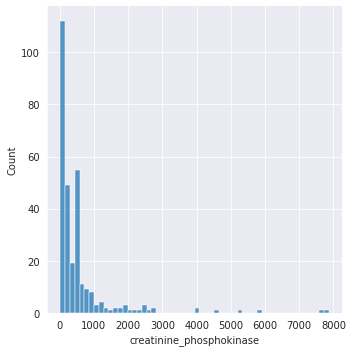

In [15]:
sns.displot(data['creatinine_phosphokinase'])

In [16]:
#Log transformation
data['creatinine_phosphokinase'] = data['creatinine_phosphokinase'].map(lambda i:np.log(i))

In [17]:
data.skew(axis=0)

age                         0.416215
anaemia                     0.288147
creatinine_phosphokinase    0.429889
diabetes                    0.344512
ejection_fraction           0.563358
high_blood_pressure         0.610375
platelets                   1.322923
serum_creatinine            4.441127
serum_sodium               -1.041150
sex                        -0.641586
smoking                     0.754384
time                        0.131173
DEATH_EVENT                 0.771002
dtype: float64

In [18]:
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

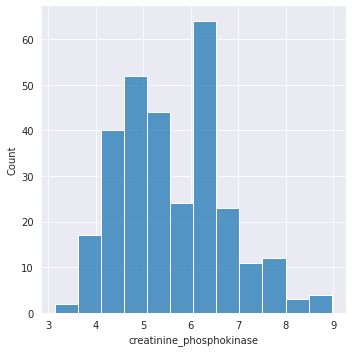

In [19]:
sns.displot(data['creatinine_phosphokinase'])

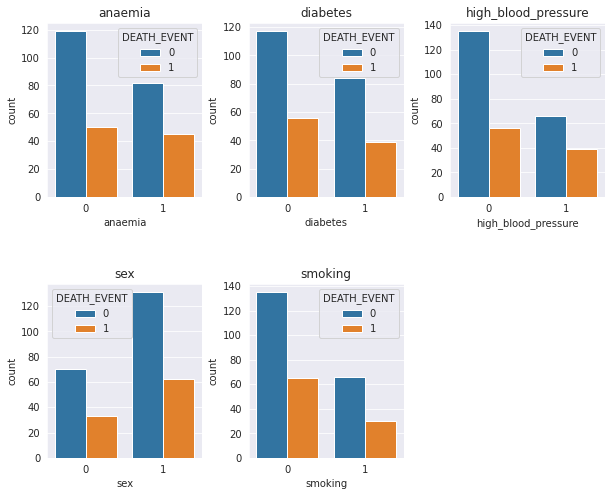

In [20]:
plt.figure(figsize=(10,8))
qualitative_columns = ["anaemia", 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
target_column = 'DEATH_EVENT'

for i,col in enumerate(qualitative_columns):
  plt.subplot(2,3,i+1)
  plt.title(col)
  plt.subplots_adjust(hspace=0.5, wspace=0.3)
  sns.countplot(data=data, x=col, hue=target_column)

plt.show()

+ for categorical : qualitative
+ for numerical: quantitative

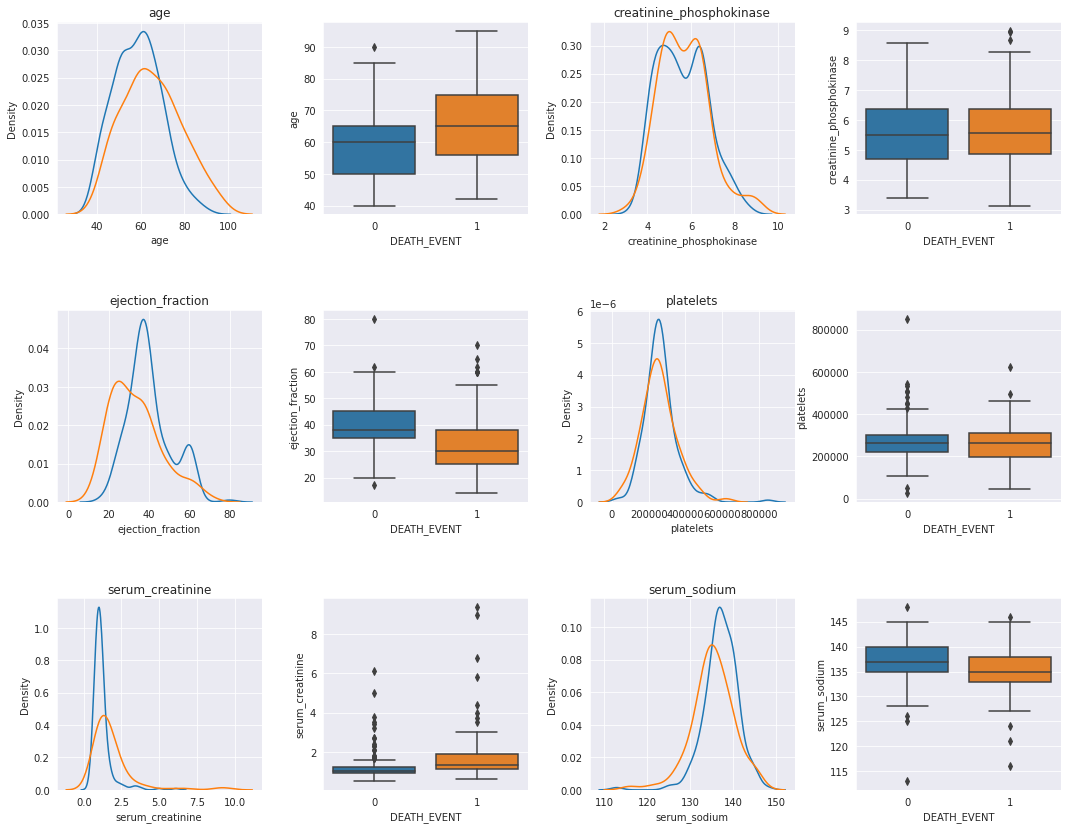

In [21]:
quantitative_columns = ['age','creatinine_phosphokinase', 'ejection_fraction','platelets', 'serum_creatinine', 'serum_sodium']

plt.figure(figsize=(18,30))
for i,col in enumerate(quantitative_columns):
  plt.subplot(6,4,i*2+1)
  plt.subplots_adjust(hspace=0.5, wspace=0.3)
  plt.title(col)
  sns.kdeplot(data.loc[data[target_column]==0, col])
  sns.kdeplot(data.loc[data[target_column]==1, col])
  plt.subplot(6,4,i*2+2)
  sns.boxplot(y=col,data=data,x=target_column)
plt.show()

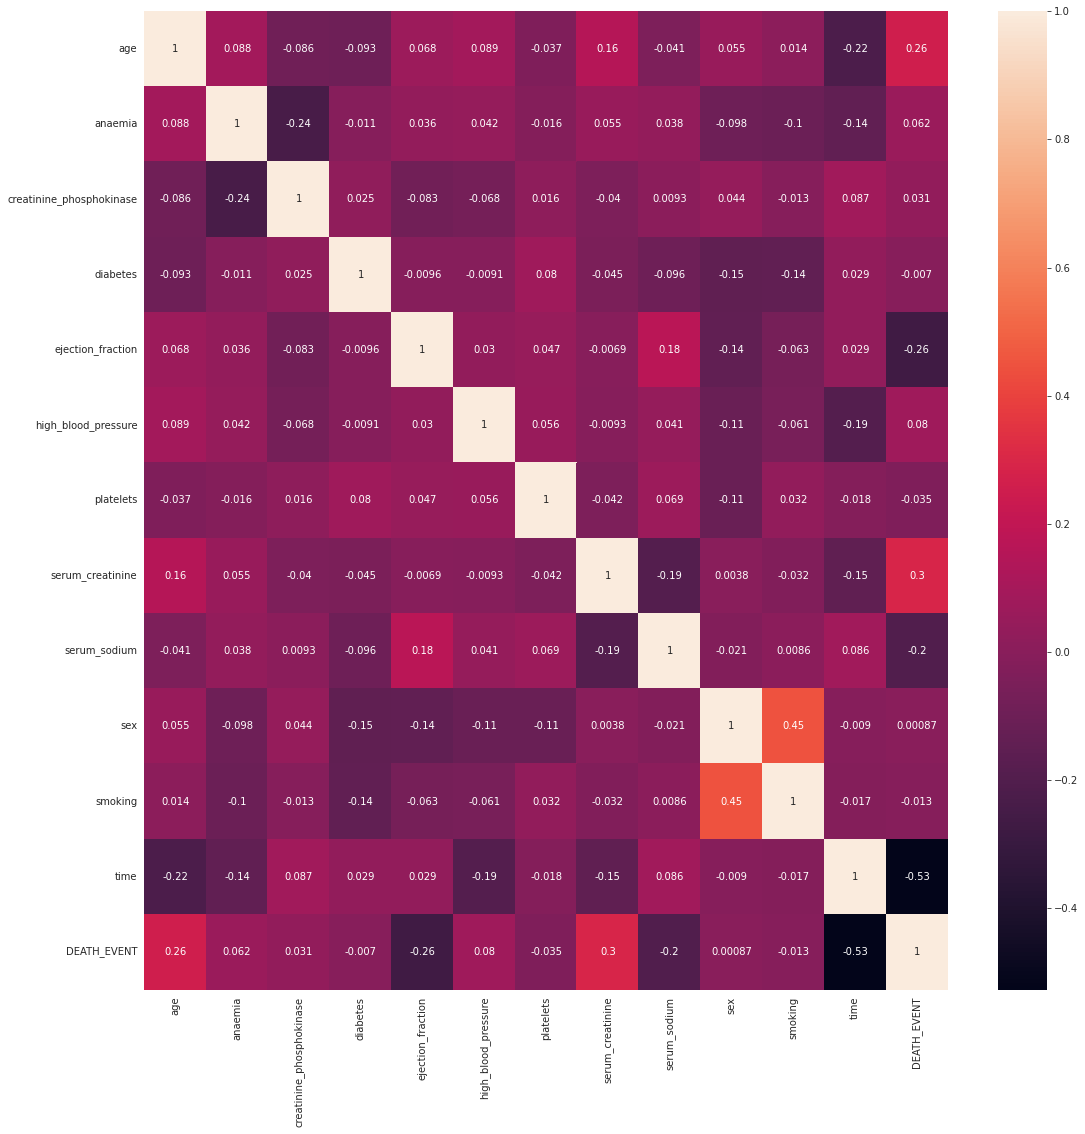

In [22]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [23]:
import plotly.graph_objects as go

In [24]:
#for high_blood_pressure
normal_bp = data[data['high_blood_pressure']==0 & (data.sex==1)] # for male
high_bp = data[data['high_blood_pressure']==1 & (data.sex==1)] # for male

labels = ['normal_bp', 'high_bp']
values = [len(normal_bp), len(high_bp)]

fig = go.Figure()
fig.add_trace(go.Pie(labels=labels, values=values))

**Feature Importance**

In [26]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,6.366470,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,8.969669,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,4.983607,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,4.709530,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,5.075174,1,20,0,327000.00,2.7,116,0,0,8,1


+ Death_event is the dependent event
+ All other columns are the independent events

In [27]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [25]:
from sklearn.model_selection import train_test_split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(data[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',]], data['DEATH_EVENT'], test_size=0.2)

In [29]:
X_train.shape

(236, 12)

In [30]:
X_test.shape

(60, 12)

In [31]:
#feature-importance - using Decision Trees and Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100) #n_estimators is the number of the decision trees
rf.fit(X_train, y_train)

feature_importance = pd.DataFrame(rf.feature_importances_)
feature_importance = (feature_importance*100).sort_values(by=0)

In [32]:
feature_importance

,0
3,1.132108
10,1.200232
1,1.259240
9,1.359809
5,1.689546
8,7.301727
6,7.521343
2,8.089502
0,8.838412
4,11.966264


In [54]:
feature_importance.index = pd.Series(X_train.columns)
feature_importance = feature_importance.reset_index(drop=True)
feature_importance.columns = ['feature', 'Feature Importance Value']

In [55]:
# feature_importance.drop(['level_0', 'index'],axis=1,inplace=True)

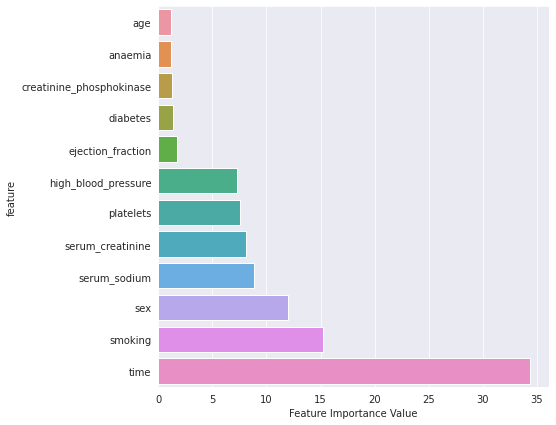

In [56]:
fig = plt.figure(figsize=(7,7))
ax1 = sns.barplot(data=feature_importance, x="Feature Importance Value", y="feature")

plt.show()

Feature Importance refers to techniques that calculate a score for all the input features for a given model — the scores simply represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

In [57]:
from sklearn.preprocessing import MinMaxScaler

Whenever we want to scale in a certain range then we need to follow min max scaler, and if we want that data should follow normal distribution we should use standard scaling.

In [60]:
min_max_scaler = MinMaxScaler()

X_minmax = min_max_scaler.fit_transform(X_train[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']])
X_minmax = pd.DataFrame(X_minmax, columns=[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']])

In [61]:
X_minmax

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,0.309091,0.296594,0.272727,0.448418,0.056180,0.818182
1,0.345455,0.181322,0.090909,0.054431,0.213483,0.636364
2,0.418182,0.286997,0.818182,0.293248,0.078652,0.969697
3,0.454545,0.304413,0.363636,0.321130,0.033708,0.636364
4,0.581818,0.638758,0.181818,0.379319,0.134831,0.787879
...,...,...,...,...,...,...
231,0.418182,0.534377,0.181818,0.277488,0.089888,0.636364
232,0.236364,0.555748,0.545455,0.339314,0.067416,0.727273
233,0.218182,0.300548,0.272727,0.233847,0.022472,0.696970
234,0.545455,0.238451,0.818182,0.353861,0.033708,0.818182


In [62]:
X_minmax.isnull().sum()

age                         0
creatinine_phosphokinase    0
ejection_fraction           0
platelets                   0
serum_creatinine            0
serum_sodium                0
dtype: int64

> simplemputer for missing values

Modelling part

In [63]:
rf = RandomForestClassifier()

In [64]:
from sklearn.model_selection import RandomizedSearchCV

The key difference from grid search is in random search, not all the values are tested and values tested are selected at random

In [68]:
params = {'n_estimators':[500,1000,5000,8000], 'max_depth':[3,5,10,20], 'min_samples_split':[80,100]}
random_search = RandomizedSearchCV(estimator=rf, param_distributions = params)

random_search.fit(X_minmax, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning:

Feature names only support names th

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [3, 5, 10, 20],
                                        'min_samples_split': [80, 100],
                                        'n_estimators': [500, 1000, 5000,
                                                         8000]})

In [69]:
random_search.best_score_

0.7374113475177305

In [70]:
random_search.best_params_

{'max_depth': 10, 'min_samples_split': 100, 'n_estimators': 8000}

In [71]:
from sklearn import metrics

In [72]:
model = random_search.best_estimator_
pred_y = model.predict(X_test[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names



In [74]:
print(metrics.classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.37      1.00      0.54        22

    accuracy                           0.37        60
   macro avg       0.18      0.50      0.27        60
weighted avg       0.13      0.37      0.20        60



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [75]:
print(metrics.confusion_matrix(y_test,pred_y))

[[ 0 38]
 [ 0 22]]


---
END
---

OverSampling

In [77]:
X_train.shape

(236, 12)

In [88]:
y_train[y_train==1].shape

(77,)

In [82]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=5)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [83]:
X_smote.shape

(318, 12)

In [87]:
y_smote[y_smote==1].shape

(159,)

---

SimpleEmputer

In [90]:
import numpy as np
from sklearn.impute import SimpleImputer

In [91]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [92]:
imputer = imputer.fit(data[['age']])
a = imputer.transform(data[['age']])

In [94]:
a = pd.DataFrame(a)

In [95]:
a.head()

,0
0,75.0
1,55.0
2,65.0
3,50.0
4,65.0
